# **Proyecto Telecom X (parte 2)**

## 🛠️ Preparación de los Datos

### Extracción del Archivo Tratado

In [1]:
#subiendo archivo
from google.colab import files
uploaded = files.upload()

Saving TelecomX_clean.csv to TelecomX_clean.csv


In [2]:
import pandas as pd
#cargar archivo
df = pd.read_csv('TelecomX_clean.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


### Eliminación de Columnas Irrelevantes

In [3]:
# Eliminar columna de ID del cliente
df.drop(columns=['customerID'], inplace=True)

# Confirmar que fue eliminada
print(df.columns)


Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias'],
      dtype='object')


In [4]:
df.head()


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


### Encoding

In [5]:
# 1. Identificar columnas categóricas
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Columnas categóricas:", cat_cols)

# 2. Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 3. Verificar resultados
print("Forma del dataframe original:", df.shape)
print("Forma del dataframe codificado:", df_encoded.shape)
df_encoded.head()


Columnas categóricas: ['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']
Forma del dataframe original: (7032, 21)
Forma del dataframe codificado: (7032, 32)


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.6,593.30,2.186667,False,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,1.996667,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,2.463333,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.266667,True,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,2.796667,True,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


### Verificación de la Proporción de Cancelación (Churn)

In [6]:
# Contar valores de la variable objetivo
churn_counts = df_encoded['Churn_Yes'].value_counts()

# Mostrar los valores absolutos
print("Cantidad de clientes por clase:")
print(churn_counts)

# Calcular proporciones
churn_proportions = df_encoded['Churn_Yes'].value_counts(normalize=True) * 100

# Mostrar proporciones con dos decimales
print("\nProporción de clientes por clase (%):")
print(churn_proportions.round(2))


Cantidad de clientes por clase:
Churn_Yes
False    5163
True     1869
Name: count, dtype: int64

Proporción de clientes por clase (%):
Churn_Yes
False    73.42
True     26.58
Name: proportion, dtype: float64


### Balanceo de Clases

In [7]:
!pip install imbalanced-learn


In [8]:
X = df_encoded.drop(columns=['Churn_Yes'])  # variables predictoras
y = df_encoded['Churn_Yes']                 # variable objetivo


In [9]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Instanciar SMOTE
smote = SMOTE(random_state=42)

# Aplicar oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar el nuevo balance
print("Distribución original:", Counter(y))
print("Distribución balanceada:", Counter(y_resampled))

Distribución original: Counter({False: 5163, True: 1869})
Distribución balanceada: Counter({False: 5163, True: 5163})


### Normalización o Estandarización

In [10]:
from sklearn.preprocessing import StandardScaler

# Crear una copia para trabajar
X_scaled = X_resampled.copy()

# Seleccionar columnas numéricas a escalar
num_cols = ['customer.tenure', 'account.Charges.Monthly',
            'account.Charges.Total', 'Cuentas_Diarias']


In [11]:
scaler = StandardScaler()

# Ajustar y transformar los datos
X_scaled[num_cols] = scaler.fit_transform(X_scaled[num_cols])

# Verificar resultado
X_scaled[num_cols].describe().round(2)


,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,10326.00,10326.00,10326.00,10326.00
mean,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.11,-1.73,-0.93,-1.73
25%,-0.95,-0.78,-0.81,-0.78
50%,-0.28,0.24,-0.40,0.24
75%,0.89,0.80,0.56,0.80
max,1.85,1.77,3.03,1.77


## 🎯 Correlación y Selección de Variables

### Análisis de Correlación

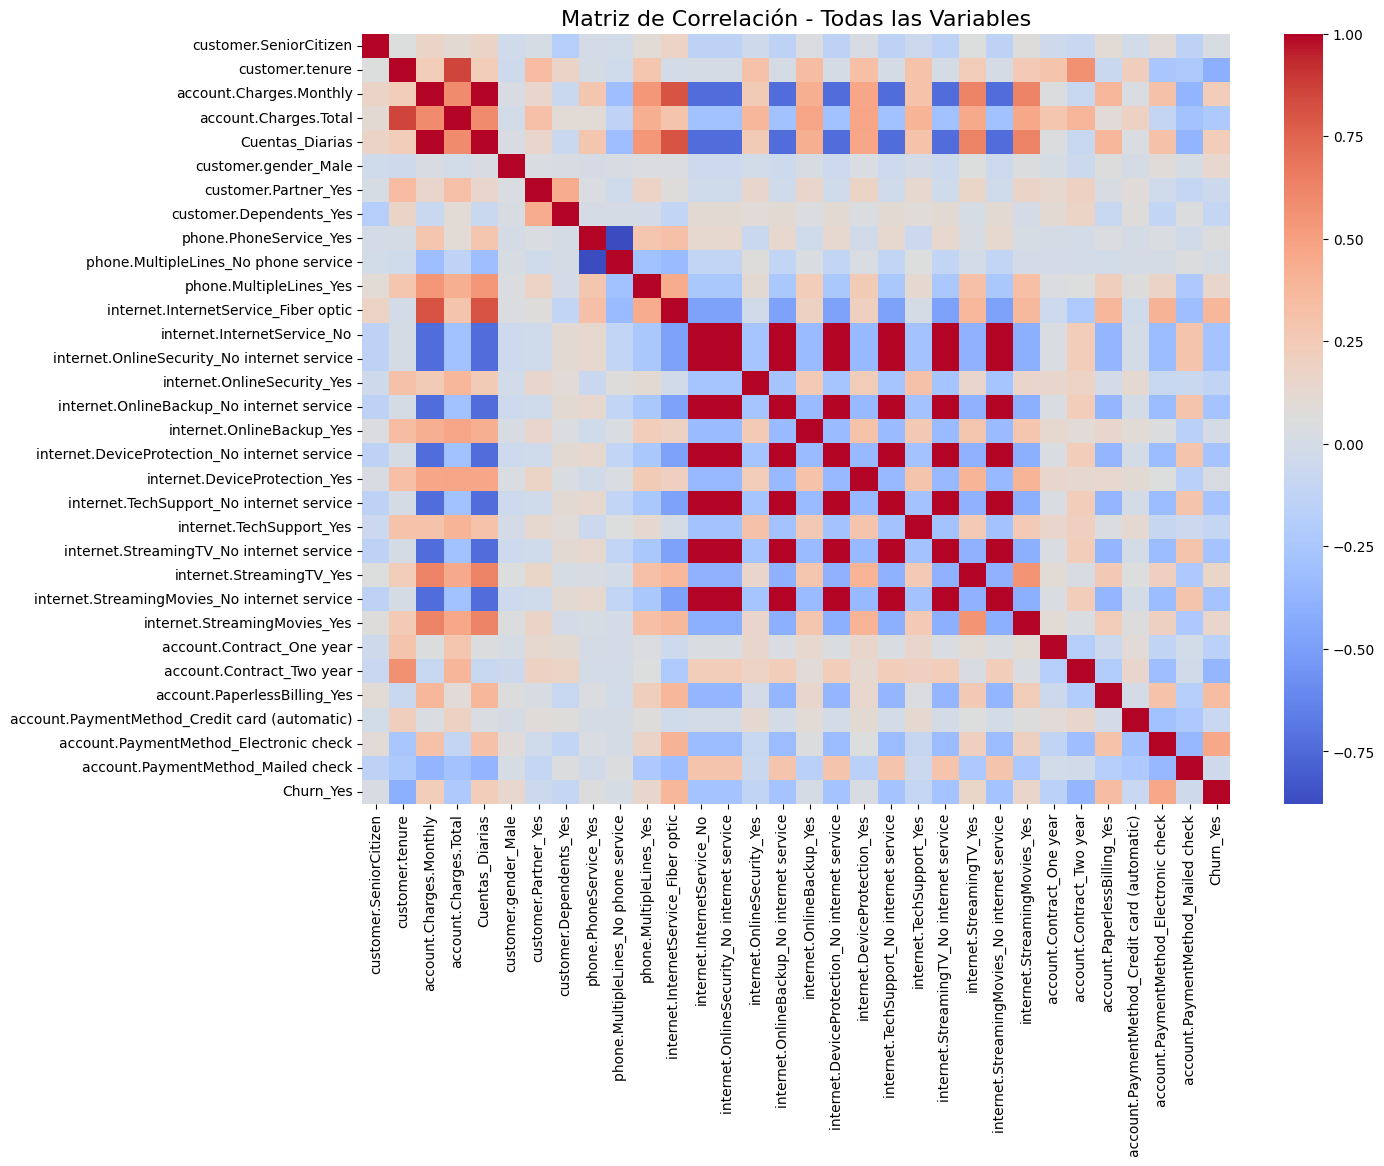


📌 Correlaciones con Churn_Yes (ordenadas):
Churn_Yes                                        1.000000
account.PaymentMethod_Electronic check           0.459969
internet.InternetService_Fiber optic             0.377544
account.PaperlessBilling_Yes                     0.341814
Cuentas_Diarias                                  0.234670
account.Charges.Monthly                          0.234670
internet.StreamingTV_Yes                         0.161122
internet.StreamingMovies_Yes                     0.152920
phone.MultipleLines_Yes                          0.143038
customer.gender_Male                             0.140136
phone.PhoneService_Yes                           0.065325
internet.DeviceProtection_Yes                    0.031753
customer.SeniorCitizen                           0.019236
phone.MultipleLines_No phone service             0.012763
internet.OnlineBackup_Yes                        0.008013
account.PaymentMethod_Mailed check              -0.035117
customer.Partner_Yes        

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Unir X_scaled con y_resampled para el análisis
df_corr = pd.concat([X_scaled, y_resampled], axis=1)

# 2. Calcular la matriz de correlación
corr_matrix = df_corr.corr()

# 3. Visualizar toda la matriz (puede ser grande)
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlación - Todas las Variables', fontsize=16)
plt.show()

# 4. Filtrar correlaciones con Churn_Yes (ordenadas)
correlaciones_churn = corr_matrix['Churn_Yes'].sort_values(ascending=False)

print("\n📌 Correlaciones con Churn_Yes (ordenadas):")
print(correlaciones_churn)

### Análisis Dirigido

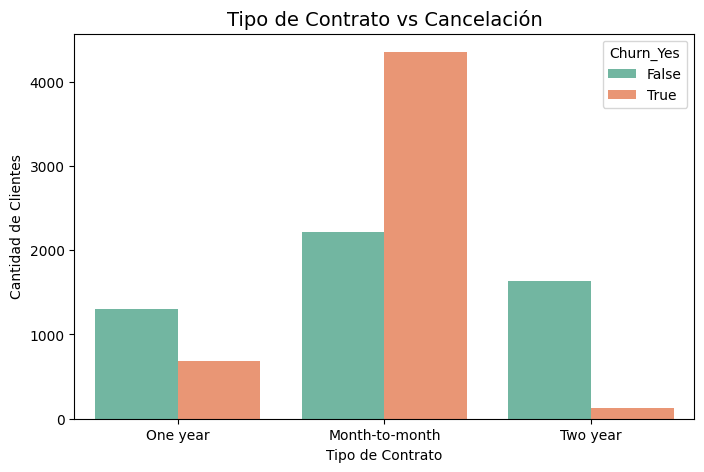

In [13]:
# Crear una columna "Contract_Type" para graficar más fácil
df_plot = pd.concat([X_scaled, y_resampled], axis=1).copy()

def get_contract_type(row):
    if row['account.Contract_One year'] == 1:
        return 'One year'
    elif row['account.Contract_Two year'] == 1:
        return 'Two year'
    else:
        return 'Month-to-month'

df_plot['Contract_Type'] = df_plot.apply(get_contract_type, axis=1)

# Boxplot: Tiempo de contrato vs Cancelación
plt.figure(figsize=(8, 5))
sns.countplot(data=df_plot, x='Contract_Type', hue='Churn_Yes', palette='Set2')
plt.title('Tipo de Contrato vs Cancelación', fontsize=14)
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.show()

/tmp/ipython-input-2060956976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Churn_Yes', y='account.Charges.Total', palette='Set3')


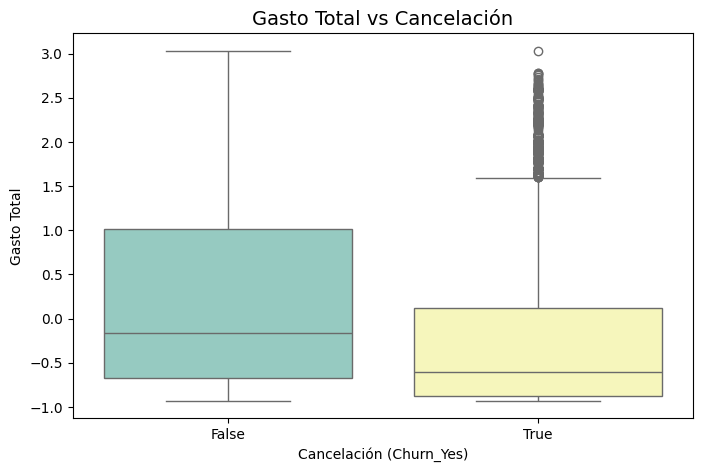

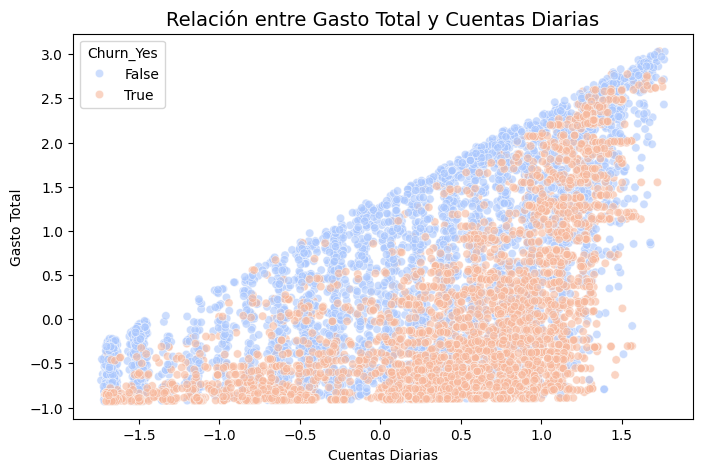

In [14]:
# Boxplot: Gasto total vs Cancelación
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_plot, x='Churn_Yes', y='account.Charges.Total', palette='Set3')
plt.title('Gasto Total vs Cancelación', fontsize=14)
plt.xlabel('Cancelación (Churn_Yes)')
plt.ylabel('Gasto Total')
plt.show()

# Scatter plot: Gasto total vs Cuentas Diarias
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_plot, x='Cuentas_Diarias', y='account.Charges.Total', hue='Churn_Yes', palette='coolwarm', alpha=0.6)
plt.title('Relación entre Gasto Total y Cuentas Diarias', fontsize=14)
plt.xlabel('Cuentas Diarias')
plt.ylabel('Gasto Total')
plt.show()
